In [2]:
pip install opencv-python matplotlib numpy


Note: you may need to restart the kernel to use updated packages.


Current directory: C:\Users\mhari\yolov3_project


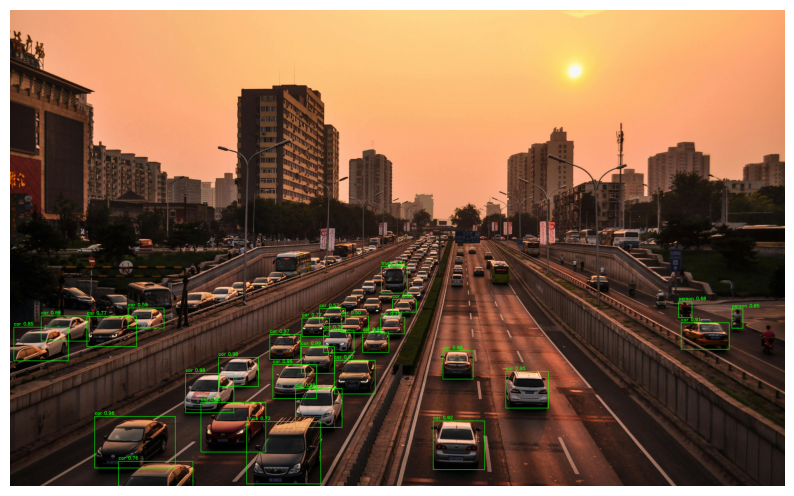

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# Ensure working directory is correct
os.chdir(r"C:\Users\mhari\yolov3_project")
print("Current directory:", os.getcwd())

# File paths
cfg_file = 'yolov3.cfg'
weight_file = 'yolov3.weights'
names_file = 'coco.names'
image_path = 'hit.jpg'

# Load YOLOv3 model
net = cv2.dnn.readNet(weight_file, cfg_file)

# Load class names
with open(names_file, 'r') as f:
    classes = f.read().strip().split('\n')

# Load image
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image '{image_path}' not found!")

height, width = image.shape[:2]

# Create a blob from the image
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)

# Get output layer names
layer_names = net.getUnconnectedOutLayersNames()

# Forward pass
outs = net.forward(layer_names)

# Detection parameters
class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5
nms_threshold = 0.4

# Process detections
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > conf_threshold:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])

# Apply Non-Maximum Suppression
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

# Draw boxes
for i in indices.flatten():
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    confidence = confidences[i]
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(image, f'{label} {confidence:.2f}', (x, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# Display the image
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
